In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv',index_col=False)
df

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
df.dtypes

PassengerId      int64
Name            object
Pclass           int64
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df_scaled=df.copy()
for col in df_scaled==object:
    df_scaled[col]=LabelEncoder().fit_transform(df_scaled[col])
# for col in df_scaled!=object:
#     df_scaled[col]=StandardScaler().fit_transform(df_scaled[[col]])
df_scaled.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,108,2,1,28,1,0,523,18,147,2,0
1,1,190,0,0,51,1,0,596,207,81,0,1
2,2,353,2,0,34,0,0,669,41,147,2,1
3,3,272,0,0,47,1,0,49,189,55,2,1
4,4,15,2,1,47,0,0,472,43,147,2,0


In [28]:
X_scaled=df_scaled.copy()
y_scaled=X_scaled.pop('Survived')

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


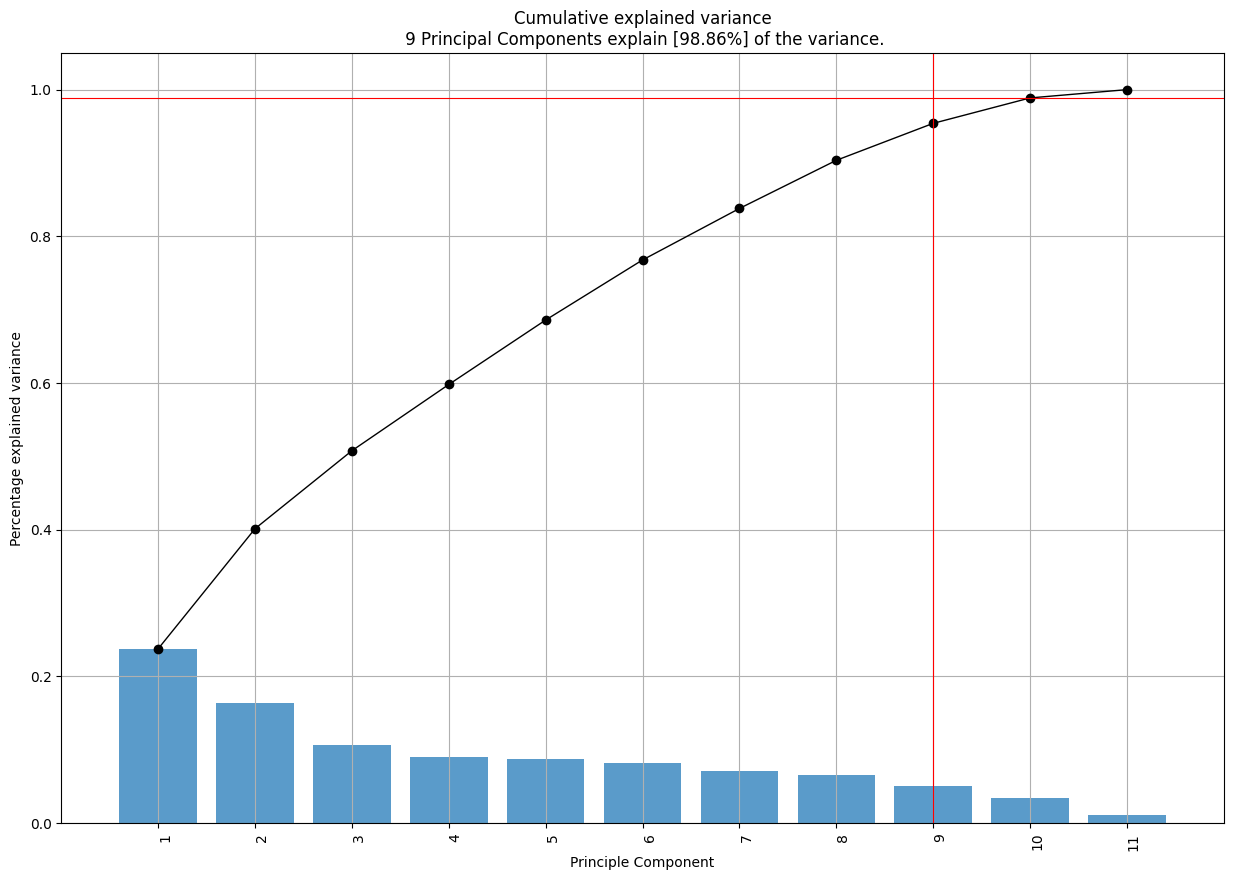

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 640x480 with 0 Axes>

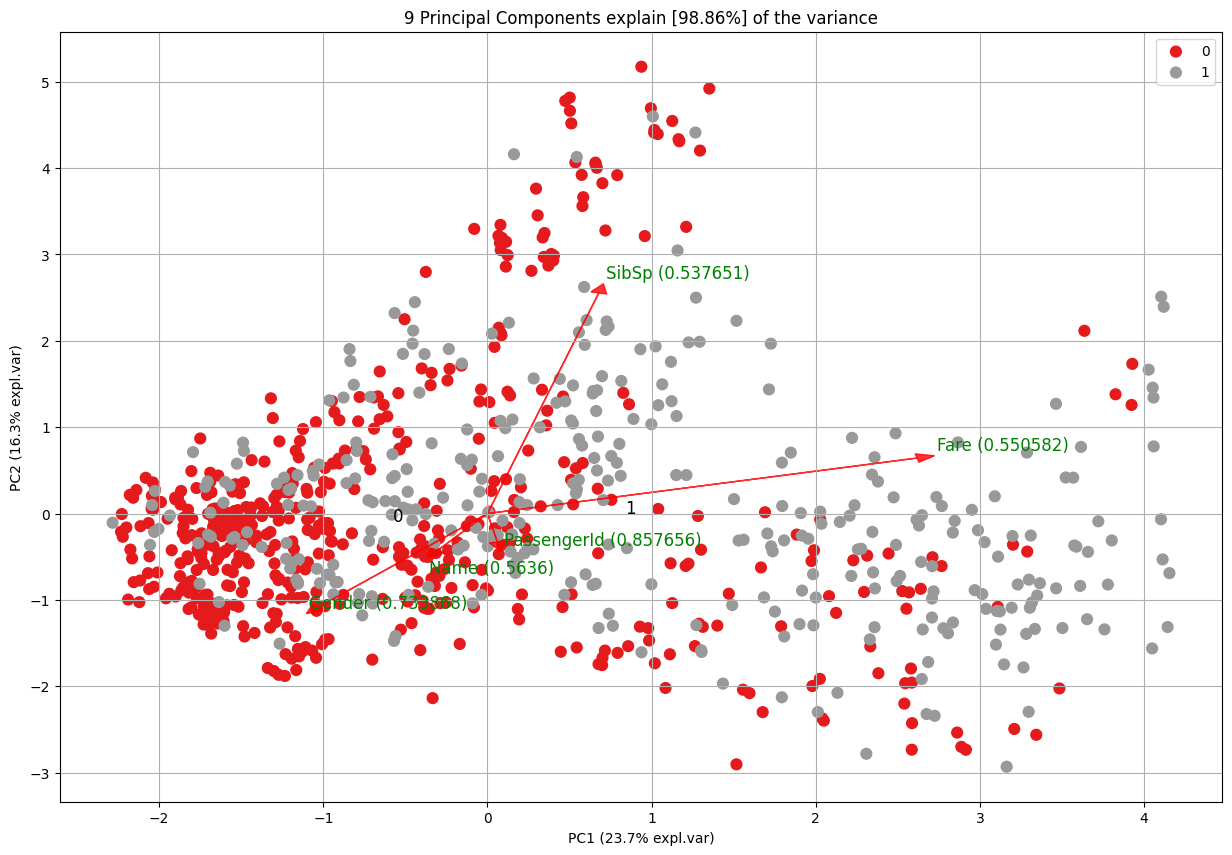

In [30]:
from pca import pca
pca=pca(normalize=True)
out=pca.fit_transform(X_scaled)
fig,ax=pca.plot()
fig,ax=pca.biplot(n_feat=5,y=y_scaled)

In [31]:
df_pca=pd.DataFrame(out['topfeat'])
df_pca[df_pca['type']=='best']

,PC,feature,loading,type
0,PC1,Fare,0.550582,best
1,PC2,SibSp,0.537651,best
2,PC3,Name,0.563600,best
3,PC4,Name,0.591587,best
4,PC5,PassengerId,0.857656,best
5,PC6,Gender,0.733868,best
6,PC7,Age,-0.599815,best
7,PC8,Embarked,-0.539191,best
8,PC9,Parch,0.760938,best


In [32]:
columns_pca=list(df_pca['feature'][df_pca['type']=='best'])
X_scaled=X_scaled[columns_pca]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.3)

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [45]:
model.score(X_test,y_test)

0.832089552238806

In [46]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10)

In [47]:
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [67]:
model2.score(X_train,y_train)

0.985553772070626

In [51]:
train=pd.concat([X_train,y_train],axis=1)

In [68]:
test=pd.concat([X_test,y_test],axis=1)

In [70]:
titanic_full=pd.concat([X_scaled,pd.DataFrame(y_scaled)],axis=1)

In [78]:
titanic_full[(titanic_full.Gender==1)&(titanic_full.Survived==0)].shape

(468, 10)

## 468 males couldn't survive

In [80]:
titanic_full[(titanic_full.Gender==1)&(titanic_full.Survived==1)].shape

(109, 10)

## 109 males survived

In [82]:
titanic_full[(titanic_full.Gender==0)&(titanic_full.Survived==0)].shape

(81, 10)

## 81 females couldn't survive

In [84]:
titanic_full[(titanic_full.Gender==0)&(titanic_full.Survived==1)].shape

(233, 10)

## 233 females survived

In [85]:
train.to_csv('titanic_train.csv',index=False)

In [86]:
test.to_csv('titanic_test.csv',index=False)

In [87]:
titanic_full.to_csv('titanic_full.csv',index=False)